## Finance Project
###### Data Description: The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
###### Context: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.
###### MOTO OF PROBLEM - we want to increase success rate of people taking personal loan so we will try to target specific kind of people who will take loan for that we are going to target those people who can take loan only

In [1]:
#Necessory Libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as ps

In [2]:
df=pd.read_excel('D:\Project2\BankFinance\Bank_Personal_Loan_Modelling.xlsx', 1)

# 1 is showing sheet number on which data is stored in excel file

In [3]:
# Personal Loan is output column
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Understand The Data

In [31]:
df.shape

(5000, 14)

##### Data is consist of 5000 rows and 14 column

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


##### All columns are numerical so you dont need to encode them

In [33]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

##### 0 Null values are there in dataset

In [34]:
#We will drop few columnd
df.drop(columns=['ID', 'ZIP Code'] ,inplace=True)

In [58]:
#5 number summery for getting outlier
fig = ps.box(df ,y = ['Age', 'Experience', 'Income', 'Family' ,'Education'])
fig.show()


Age Column :-We know people above 55 wont take personal loan so we have to remove them also childern below wouldnot take loan as he may be student

Experience :-People with experince of more than 30 year means there age is almost more than 50
Also some people have experience in negative these may because of some error we have to handle it

Income :- Contain Outlier we have to remove them

Family :-Na

Education :-Na


In [60]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




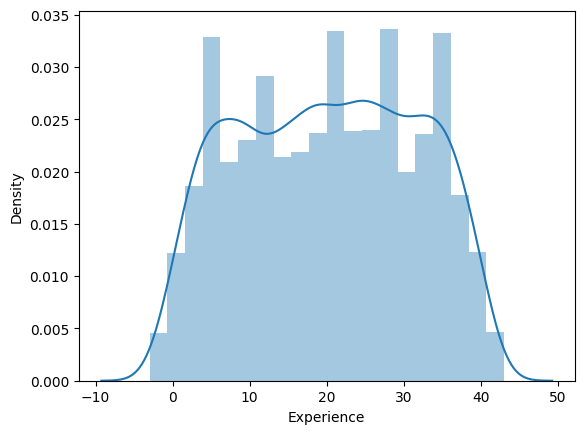

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




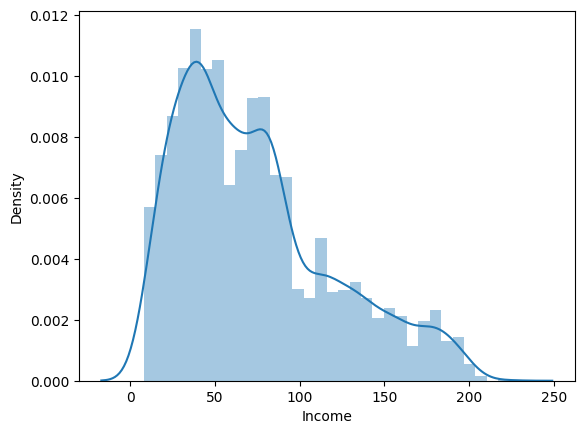

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




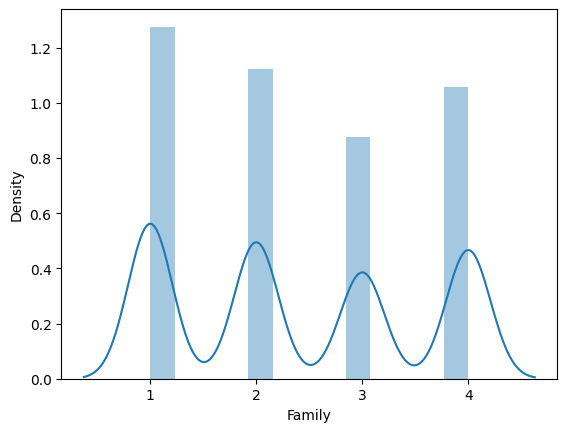

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




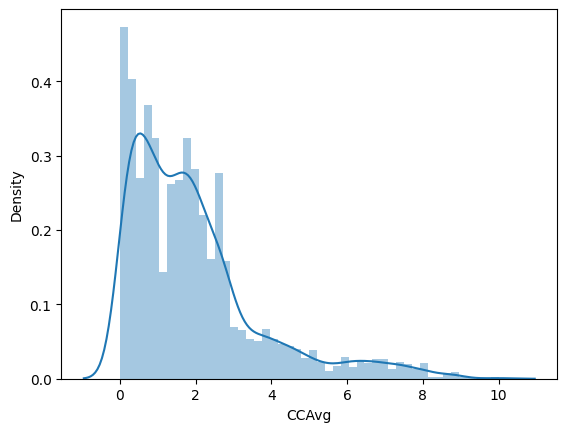

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




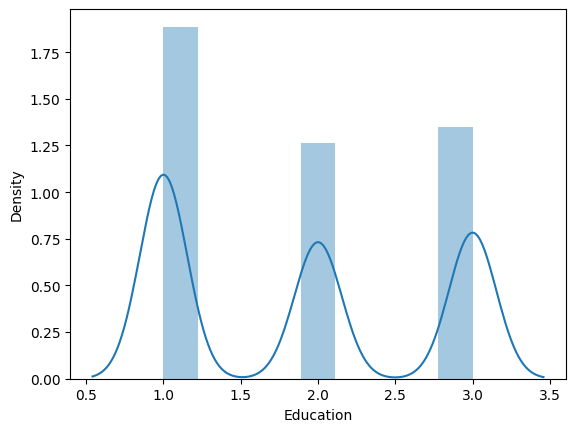

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




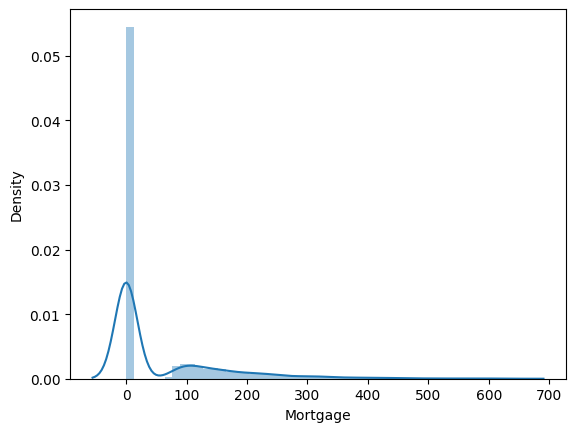

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




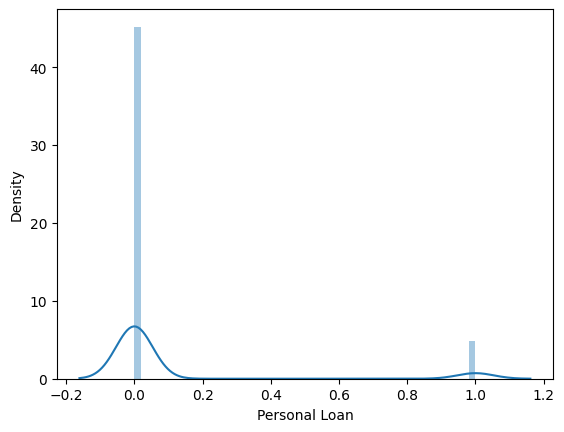

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




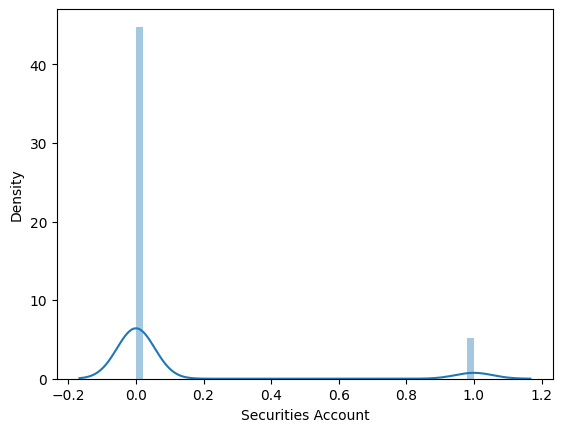

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




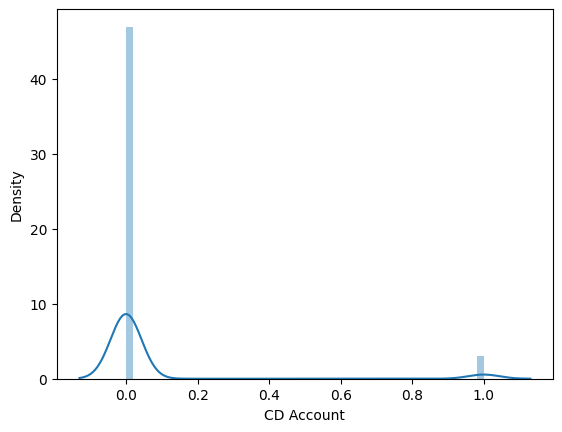

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




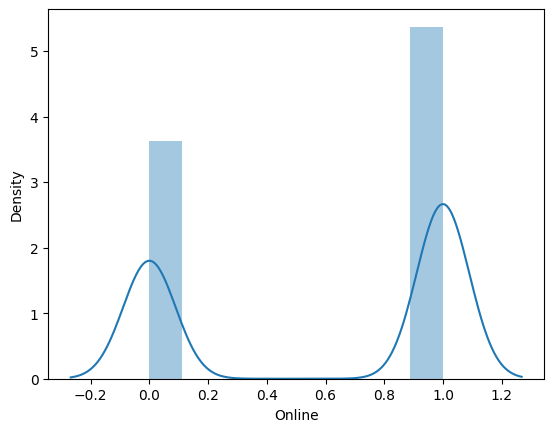

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1732662456.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




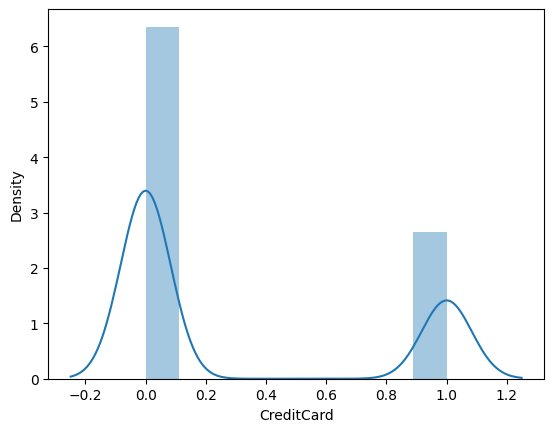

In [62]:
def distplot(column_name):
    sns.distplot(df[column_name])
    plt.show()
    
    
for i in df.select_dtypes(exclude='object').columns[1:]:
    distplot(i)

    


#### If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [64]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

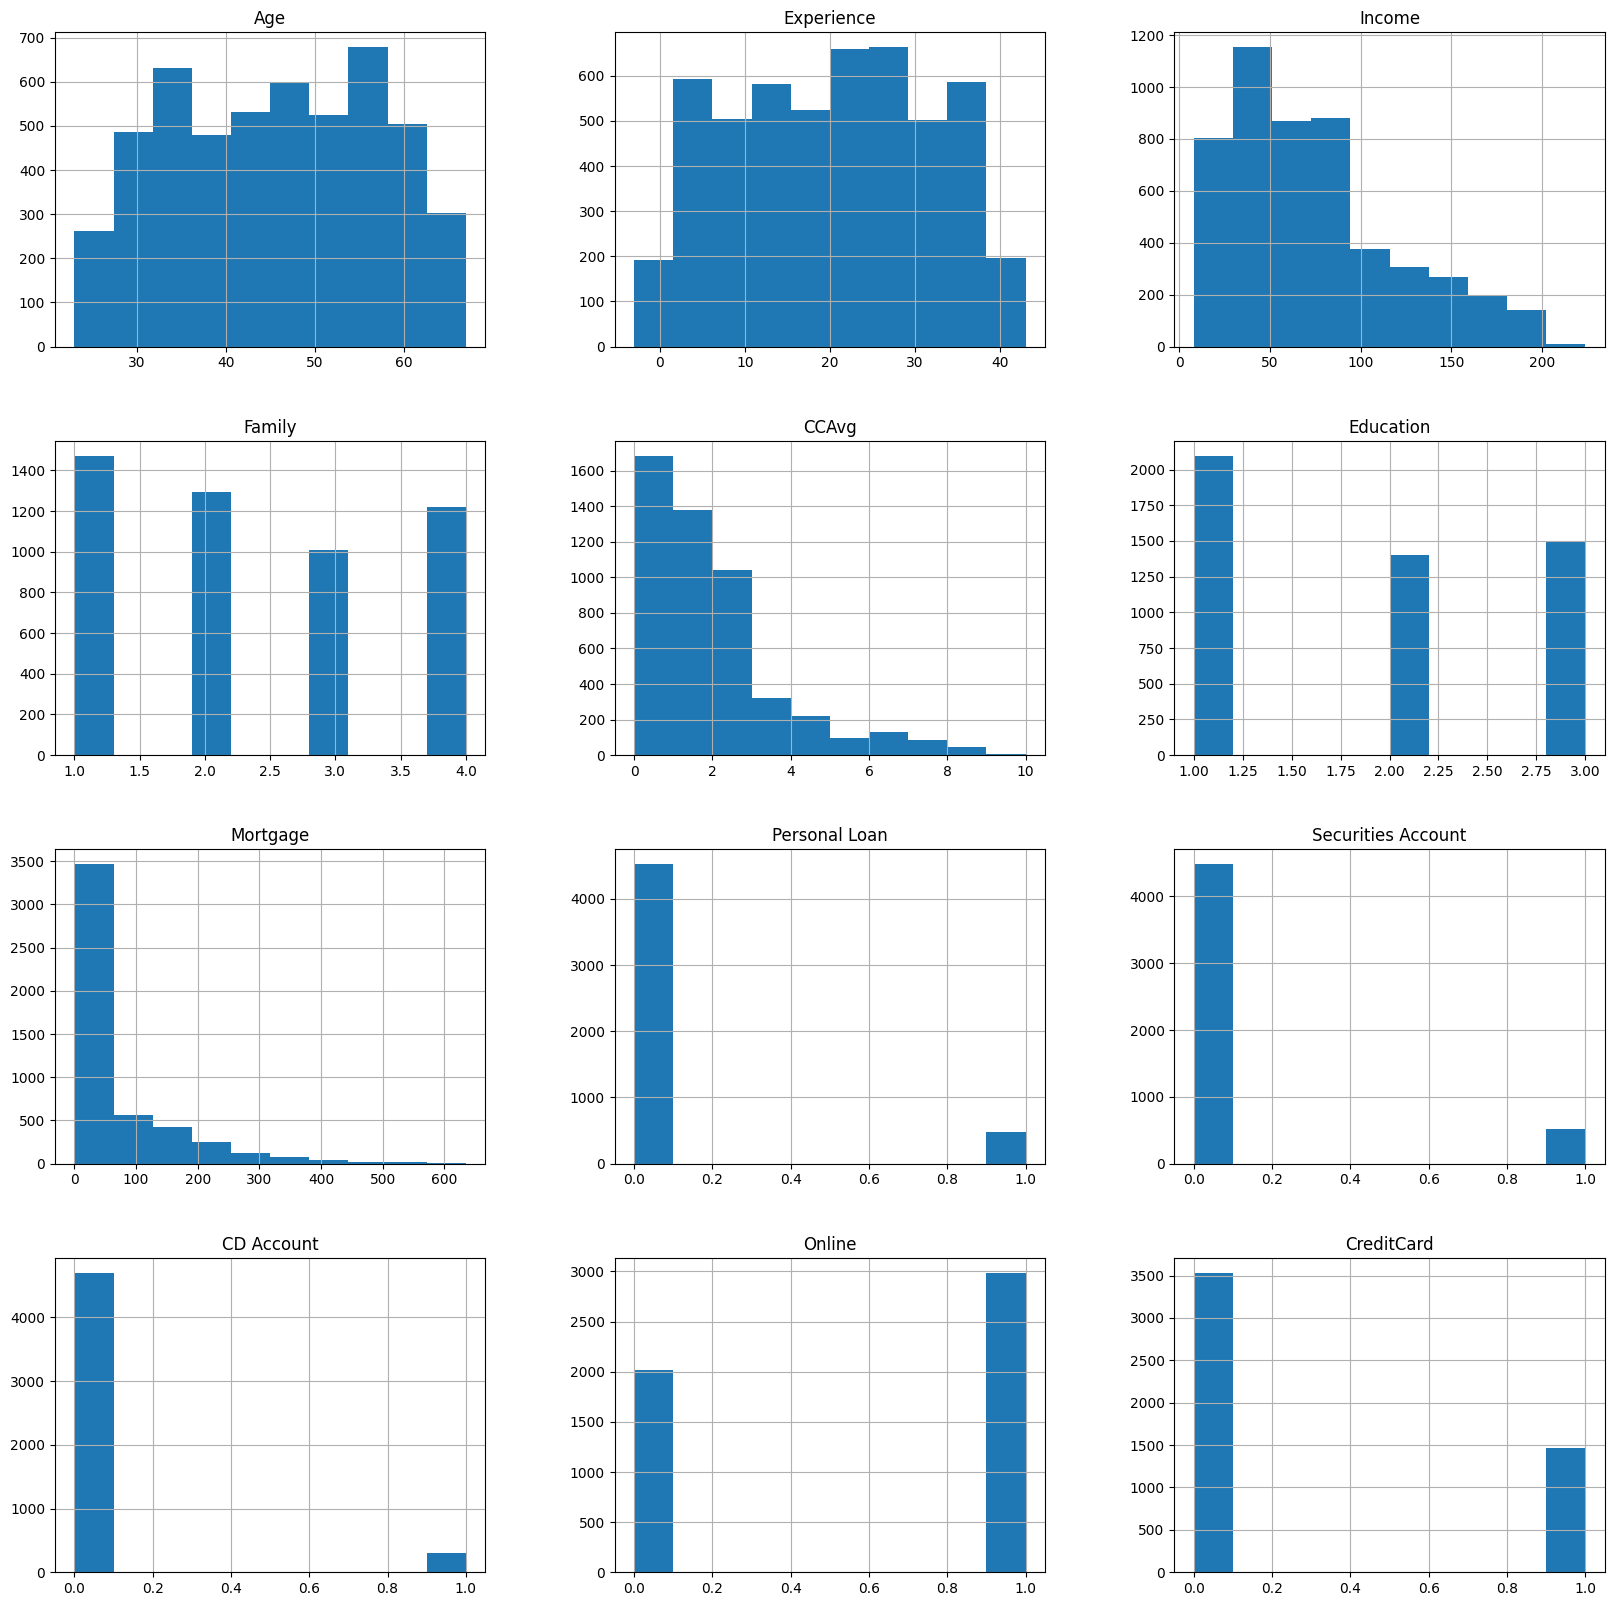

In [68]:
df.hist(figsize= (20,20))
plt.show()

In [81]:
#Handle Experience Column
df['Experience'].mean()

20.1046

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\248325757.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




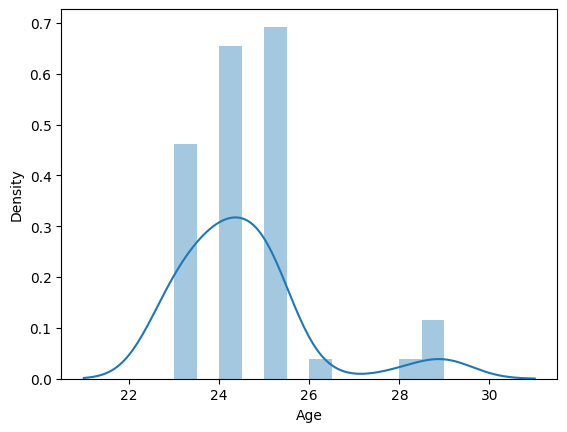

In [140]:
negative_exp=df[df['Experience']<0]
negative_exp.loc[:,('Age','Experience')]
sns.distplot(negative_exp['Age'])
plt.show()

#You can see max negative experience people are belong from 22to 26 age

In [141]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [154]:
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [147]:
print('Total percentage of negative data is {} these data we have to handel'.format(len(negative_exp)/len(df) * 100))

Total percentage of negative data is 1.04 these data we have to handel


In [149]:
data=df.copy()
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [150]:
data['Experience'] = np.where(data['Experience']  < 0,
                              data['Experience'].mean(),
                              data['Experience'])

# .where(condition ,[x,y]) will help me to raplace negative experince

In [166]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048719,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048719,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018097,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


#### You can see Few column have high correlation (almost 1 ) so we dont need both column it will increase complexity we can drop them  ex-Age a nd Experience

<Axes: >

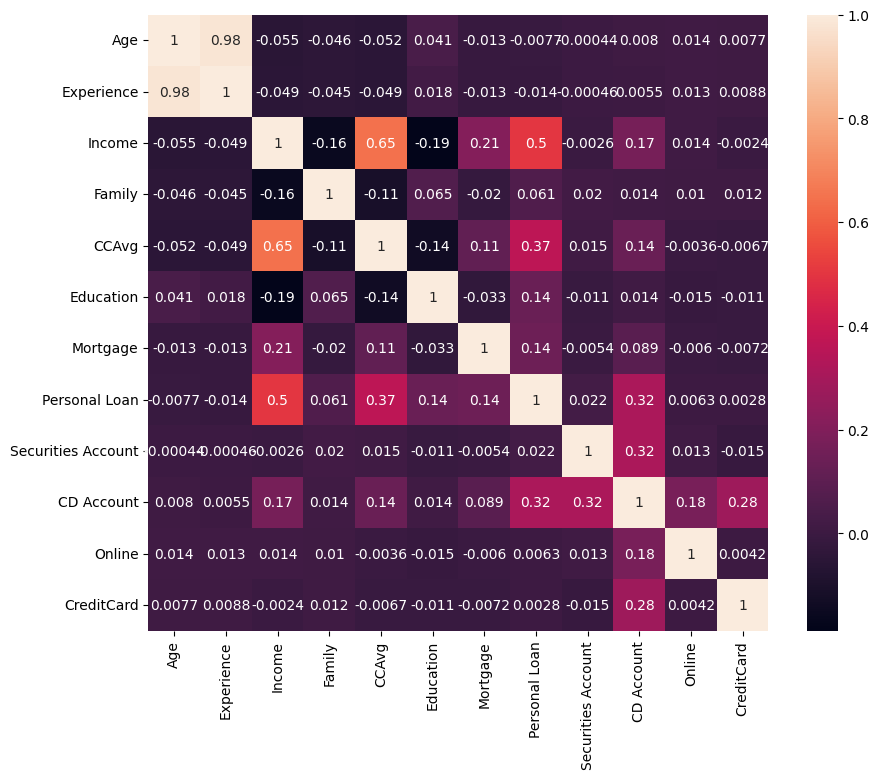

In [169]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [175]:
data = data.drop(columns=['Experience'])


In [177]:
data['Education'].skew()
#Data is properly distributed

0.22709331566088503

In [180]:
data['Education'].value_counts()
#1-UnderGraduate
#2-Graduate
#3-Post Graduate
#We will convert them in categorical column so that we can read them



1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [187]:
def education_(x):
    if x == 1:
        return 'Undergraduate'
    elif x == 2:
        return 'graduate'
    else :
        return 'Professional Person'

In [189]:
data['EDU'] = data['Education'].apply(education_)

In [215]:
data['EDU'].value_counts().reset_index()['index']

0          Undergraduate
1    Professional Person
2               graduate
Name: index, dtype: object

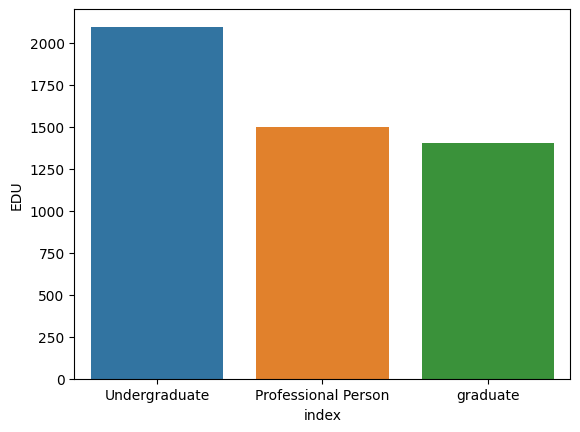

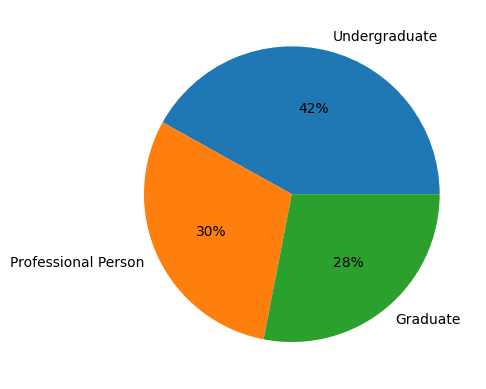

In [216]:
sns.barplot(data = data['EDU'].value_counts().reset_index() ,x='index' ,y='EDU')
plt.show()

my_label=['Undergraduate' ,'Professional Person' , 'Graduate' ]
plt.pie(data = data['EDU'].value_counts().reset_index()  , x = 'EDU' ,autopct='%1.00f%%' ,labels=my_label)
plt.show()

In [228]:
#Handle CD Account Data
data['CD Account'].unique()

array([0, 1], dtype=int64)

In [229]:
data['Securities Account'].unique()

array([1, 0], dtype=int64)

In [246]:
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & Depostie"
    
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securites & Depsotie account"
    
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Scurites account"
    
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposite account"

In [247]:
data['Account Holder Cat'] = data.apply(security ,axis=1)

In [254]:
data['Account Holder Cat'].value_counts().reset_index()

,index,Account Holder Cat
0,Does not hold Securites & Depsotie account,4323
1,Holds only Scurites account,375
2,Holds only Deposite account,155
3,Holds Securities & Depostie,147


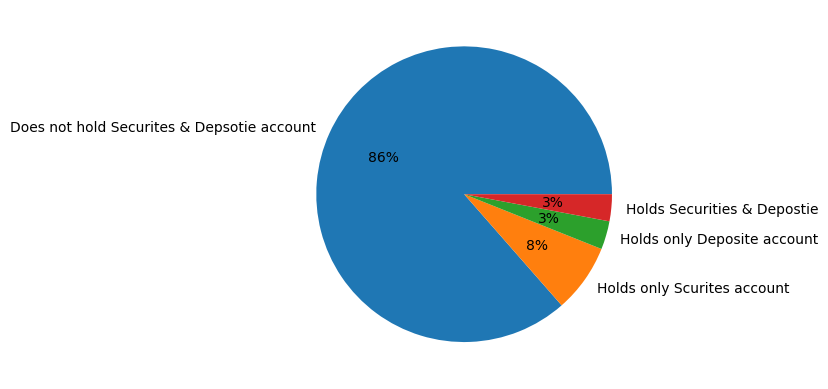

In [255]:
plt.pie(data = data['Account Holder Cat'].value_counts().reset_index()  , x = 'Account Holder Cat' ,autopct='%1.00f%%' ,labels=data['Account Holder Cat'].value_counts().reset_index()['index'])
plt.show()

#### WE can Target these 86% data which doenot hold Securities or Deposite account

In [258]:
ps.box(data ,x='Education' ,y='Income' ,facet_col= 'Personal Loan')

In [259]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account Holder Cat'],
      dtype='object')

We can approach person with  Personla Loan  =0

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1690828232.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1690828232.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




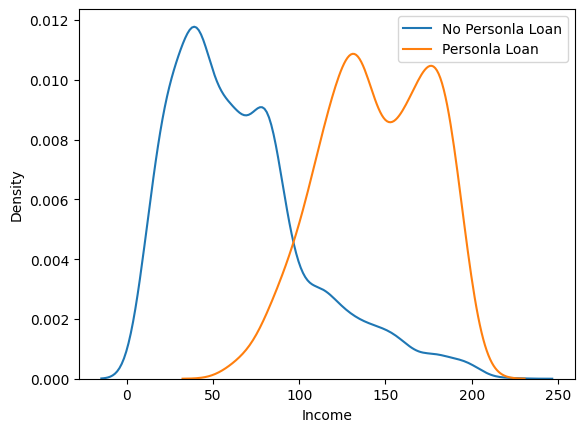

In [269]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'] ,hist= False ,label='No Personla Loan')
sns.distplot(data[data['Personal Loan'] == 1]['Income'] ,hist= False ,label='Personla Loan')
plt.legend()

In [ ]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'] ,hist= False ,label='No Personla Loan')
sns.distplot(data[data['Personal Loan'] == 1]['Income'] ,hist= False ,label='Personla Loan')
plt.legend()

You can see those who doesnot have any loan maximum people are with less income <100
Also only few people are there whose income >100 still didnot get loan

In seconde graph we can see person with income >100 get easily loan 

Rare case we can see person with salary<100 get loan

In [271]:
def plot_function(col1 ,col2 ,label1 ,label2 ,title): 
    sns.distplot(data[data[col1] == 0][col2] ,hist= False ,label=label1) 
    
    sns.distplot(data[data[col1] == 1][col2] ,hist= False ,label=label2) 
    plt.legend()
    
    plt.title(title)

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1885216131.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1885216131.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




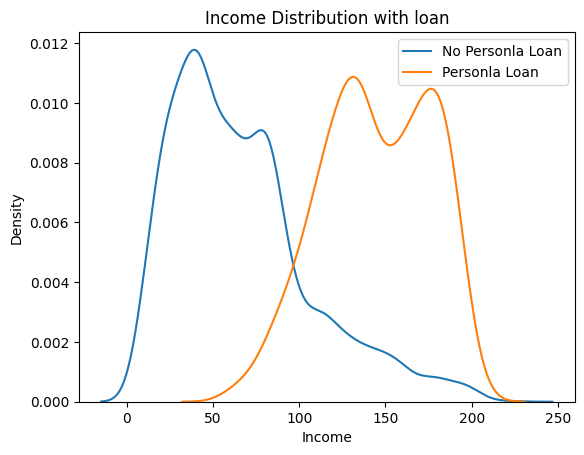

In [275]:
plot_function('Personal Loan' ,'Income' ,'No Personla Loan' ,'Personla Loan' ,'Income Distribution with loan')

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1885216131.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\1885216131.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




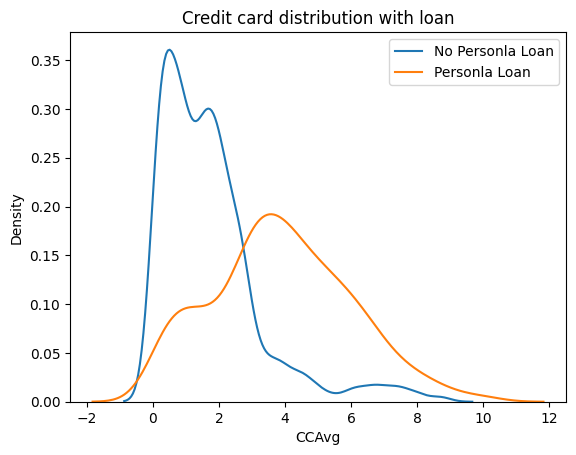

In [279]:
plot_function('Personal Loan' ,'CCAvg' ,'No Personla Loan' ,'Personla Loan' ,'Credit card distribution with loan')

In [282]:
col = ['Securities Account',
       'Online',
       'Account Holder Cat',
       'CreditCard'
       ]

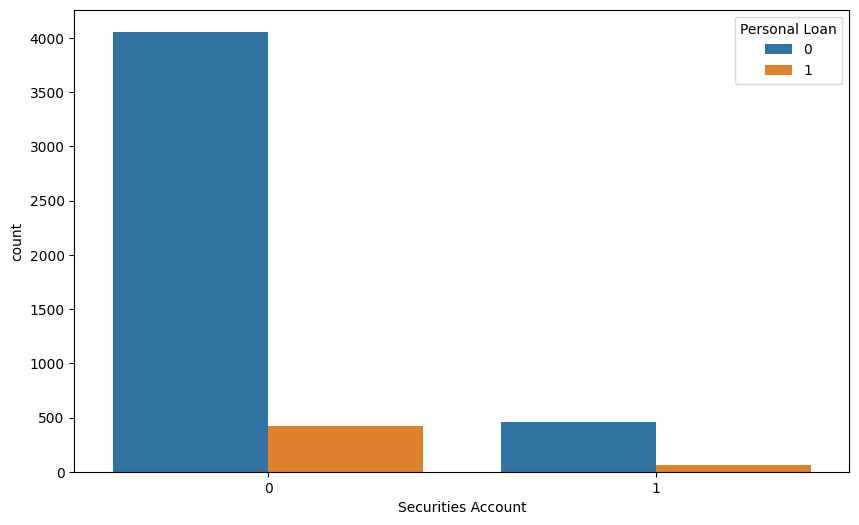

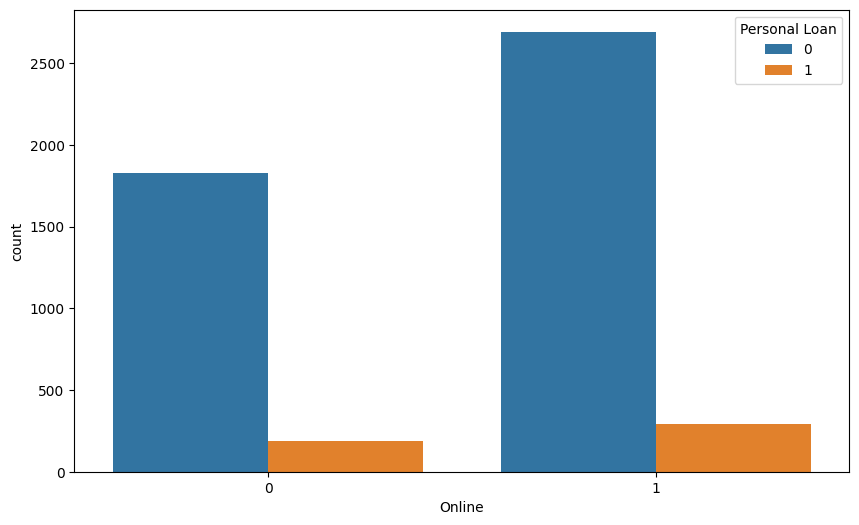

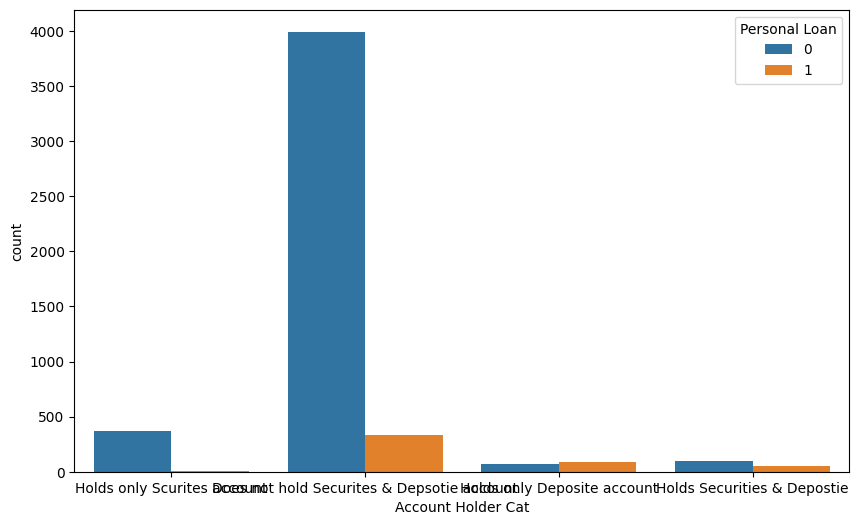

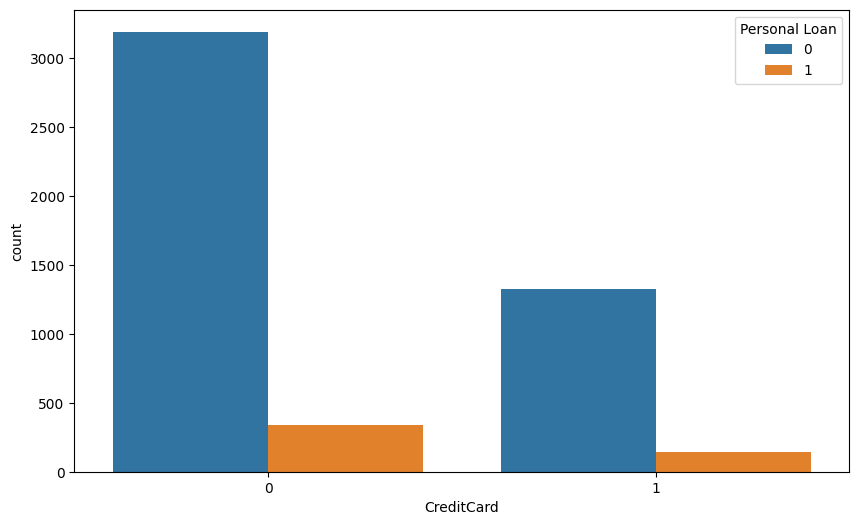

In [285]:
for i in col:
    plt.figure(figsize=(10,6))
    sns.countplot(x = i ,data=data ,hue='Personal Loan')
    plt.show()

In [286]:
#Handle Skewness In data 
# 1)you can use lognormal 
# 2)PowerTransformer
from scipy.stats import zscore

In [2]:
q1 =data.quantile(0.25)
q2 =data.quantile(0.50)
q3 =data.quantile(0.75)
IQR = q3-q1


NameError: name 'data' is not defined

In [294]:
#Log Normal Transformation
data_1 = data[['Income' ,'CCAvg']]
data_1 = np.log(data_1 + 1)
data_1

,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465


C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\3533702364.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Income', ylabel='Density'>

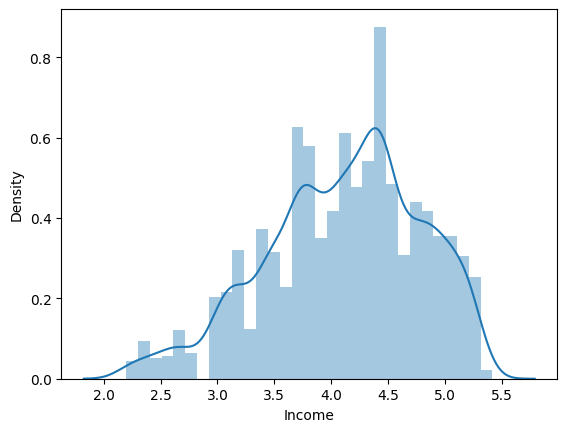

In [303]:
sns.distplot(data_1['Income'])

In [296]:
#2]PowerTransformer
from sklearn.preprocessing import PowerTransformer


In [301]:
pt  = PowerTransformer(method='yeo-johnson' ,standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
Income =pt.transform(data['Income'].values.reshape(-1,1))

C:\Users\pramod.khavare\AppData\Local\Temp\ipykernel_20548\4118576098.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

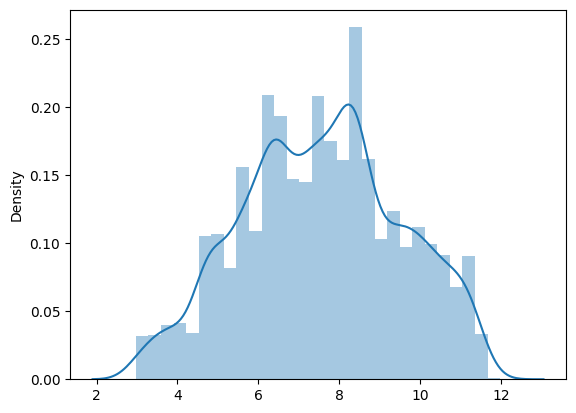

In [302]:
sns.distplot(Income)

In [305]:
# -Handel Outlier
# _Cat -num
# _fit data

In [276]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account Holder Cat'],
      dtype='object')

In [197]:
data.groupby('EDU')['Age'].count()

EDU
Professional Person    1501
Undergraduate          2096
graduate               1403
Name: Age, dtype: int64

In [ ]:
plt.pie(data = data , values = )

In [63]:
for i in df.columns:
    print("*"*20,i,"*"*20)
    print(set(df[i]))
    print()

******************** Age ********************
{23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67}

******************** Experience ********************
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, -2, -3, -1}

******************** Income ********************
{8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145, 148, 

In [36]:
# TO check Biasness in Data
df['Personal Loan'].value_counts().reset_index()

,index,Personal Loan
0,0,4520
1,1,480


##### You can see Data is Biased as it have 4520 data rows of one category and 480 rows of another category

<Axes: xlabel='index', ylabel='Personal Loan'>

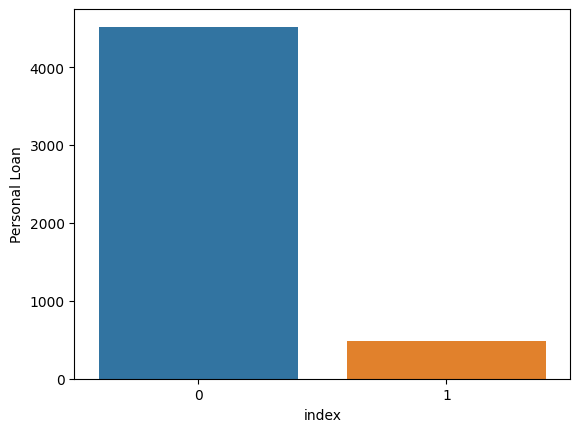

In [37]:
op = df['Personal Loan'].value_counts().reset_index()
sns.barplot(x=op['index'] , y='Personal Loan' , data=op)
